# First Name: YanQing
# Last Name:  Zhong

# Import Libraries  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi 
import matplotlib.pyplot as plt

# Import Data

In [2]:
bottle=pd.read_csv('bottle.csv',low_memory=False)
pd.set_option('display.float_format',lambda x:'%f'%x)
print(len(bottle)) #number of rows (observations)

864863


# Data management 

In [3]:
# Convert Depth and Phosphate variable to numeric
bottle['Depthm']=pd.to_numeric(bottle['Depthm'],errors='coerce') 
bottle['PO4uM']=pd.to_numeric(bottle['PO4uM'],errors='coerce') 
bottle['PO4q']=pd.to_numeric(bottle['PO4q'],errors='coerce')

In [4]:
# Replace null values
bottle['PO4q'].replace('null', np.nan, inplace=True)

# Create a subset 

### Depth range 0 to 100, and select phosphate data from both ok data and data from the CTD device

In [5]:
sub1 = bottle[(bottle['Depthm'] > 0) & 
              (bottle['Depthm'] <= 100) & 
              ((bottle['PO4q'].isnull()) | (bottle['PO4q'] == 6))]

In [6]:
sub2=sub1.copy()
print(len(sub2))

181196


# Draw Boxplot 

### Show relationship between Depth Category and  Phosphate concentration

In [7]:
sub2['DepthCategory']=pd.cut(sub2.Depthm,[0,20,40,60,80,100])
sub2['DepthCategory']=sub2['DepthCategory'].astype('category')
sub2['DepthCategory']=sub2['DepthCategory'].cat.rename_categories(["Shallow","Mid-shallow","Mid","Mid-deep","Deep"])

<IPython.core.display.Javascript object>


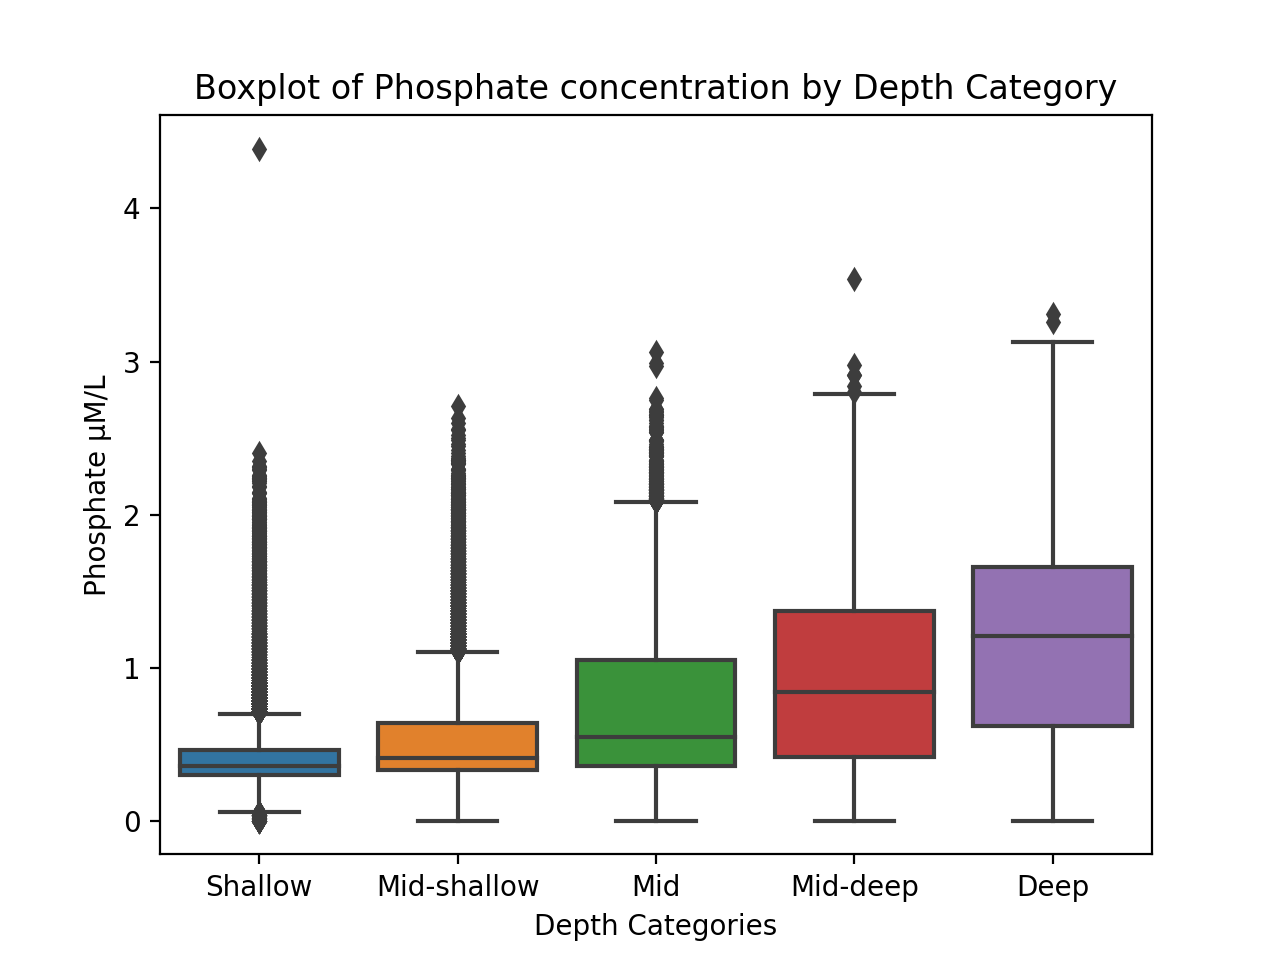

Text(0, 0.5, 'Phosphate μM/L')

In [8]:
%matplotlib notebook
sns.boxplot(x='DepthCategory',y='PO4uM',data=sub2)
plt.title('Boxplot of Phosphate concentration by Depth Category')
plt.xlabel('Depth Categories')
plt.ylabel('Phosphate μM/L')

# Perform ANOVA 

### Analysis relationship between Depth Category and Phosphate concentration

In [9]:
sub3=sub2[['DepthCategory','PO4uM']].dropna()

In [10]:

model1 = smf.ols(formula='PO4uM~C(DepthCategory)', data=sub3).fit()
print(model1.summary())


                            OLS Regression Results                            
Dep. Variable:                  PO4uM   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                 1.714e+04
Date:                Wed, 03 May 2023   Prob (F-statistic):               0.00
Time:                        14:52:48   Log-Likelihood:            -1.0717e+05
No. Observations:              181157   AIC:                         2.144e+05
Df Residuals:                  181152   BIC:                         2.144e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

# Get means for phosphate (PO4uM)

In [11]:
print('means for phosphate by Depth Category')
m1=sub3.groupby('DepthCategory').mean()
print(m1)


means for phosphate by Depth Category
                 PO4uM
DepthCategory         
Shallow       0.420544
Mid-shallow   0.553486
Mid           0.739020
Mid-deep      0.937939
Deep          1.174182


# Get standard deviations for phosphate (PO4uM)

In [12]:
print('standard deviations for phosphate by Depth Category')
sd1=sub3.groupby('DepthCategory').std()
print(sd1)

standard deviations for phosphate by Depth Category
                 PO4uM
DepthCategory         
Shallow       0.230398
Mid-shallow   0.354295
Mid           0.479237
Mid-deep      0.552252
Deep          0.594644


# Due to P value is less than 0.05 so perform post hoc analysis-Tukeyhsd test

In [13]:
mc1=multi.MultiComparison(sub3['PO4uM'],sub3['DepthCategory'])
res1=mc1.tukeyhsd()
print(res1.summary())

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
   group1      group2   meandiff p-adj  lower   upper  reject
-------------------------------------------------------------
       Deep         Mid  -0.4352   0.0 -0.4447 -0.4256   True
       Deep    Mid-deep  -0.2362   0.0  -0.246 -0.2265   True
       Deep Mid-shallow  -0.6207   0.0 -0.6303 -0.6111   True
       Deep     Shallow  -0.7536   0.0 -0.7624 -0.7449   True
        Mid    Mid-deep   0.1989   0.0  0.1896  0.2082   True
        Mid Mid-shallow  -0.1855   0.0 -0.1947 -0.1764   True
        Mid     Shallow  -0.3185   0.0 -0.3267 -0.3102   True
   Mid-deep Mid-shallow  -0.3845   0.0 -0.3938 -0.3751   True
   Mid-deep     Shallow  -0.5174   0.0 -0.5259 -0.5089   True
Mid-shallow     Shallow  -0.1329   0.0 -0.1412 -0.1246   True
-------------------------------------------------------------
